In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


There are 26729 inputs in this data set, and missing data found in Name, SexuponOutcome, AgeuponOutcome (OutcomeSubtype probably not important anyway).

Let's first look at the Name column. What are the most popular dog/cat names?

In [5]:
train[train['AnimalType'] == 'Dog']['Name'].value_counts(ascending=False).head(10)

Bella       113
Max         112
Charlie      89
Daisy        86
Buddy        78
Rocky        77
Lucy         76
Princess     72
Chico        53
Lola         53
Name: Name, dtype: int64

In [6]:
train[train['AnimalType'] == 'Cat']['Name'].value_counts(ascending=False).head(10)


Oliver     25
Max        24
Bella      22
Lily       21
X          21
Oreo       20
Daisy      20
Sam        18
Luna       18
Charlie    18
Name: Name, dtype: int64

In [7]:
train[train['OutcomeType'] == 'Adoption']['Name'].value_counts(ascending=False).head(10)

Max         59
Bella       54
Daisy       53
Charlie     52
Lucy        49
Buddy       41
Luna        40
Princess    38
Ginger      36
Rocky       31
Name: Name, dtype: int64

Having name should be important for animal's outcome. Let's explore that

In [8]:
Pet_without_name = train[train['Name'].isnull()]['OutcomeType'].value_counts()
Pet_without_name

Transfer           4925
Adoption           1678
Euthanasia          815
Return_to_owner     153
Died                120
Name: OutcomeType, dtype: int64

In [9]:
Pet_without_name.sum()

7691L

In [11]:
Pet_with_name = train[train['Name'].isnull()!= 1]['OutcomeType'].value_counts()
Pet_with_name

Adoption           9091
Return_to_owner    4633
Transfer           4497
Euthanasia          740
Died                 77
Name: OutcomeType, dtype: int64

In [12]:
pet_name = pd.concat([Pet_without_name,Pet_with_name], axis = 1)
pet_name.columns = ['outcome_Petwithoutname', 'outcome_Petwithname']
pet_name

,outcome_Petwithoutname,outcome_Petwithname
Adoption,1678,9091
Died,120,77
Euthanasia,815,740
Return_to_owner,153,4633
Transfer,4925,4497


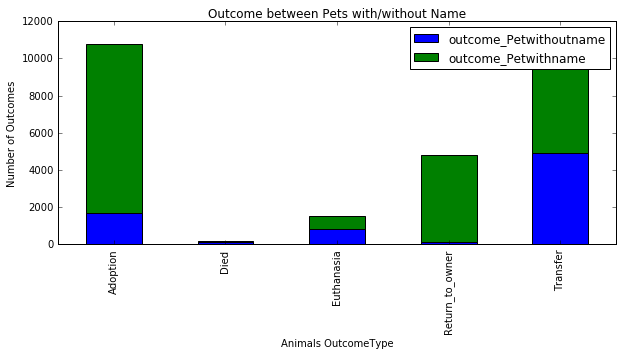

In [14]:
plt.figure()
pet_name.plot(kind='bar',stacked=True,figsize = (10,4))
plt.ylabel('Number of Outcomes')
plt.xlabel('Animals OutcomeType')
plt.title('Outcome between Pets with/without Name')
plt.show()

Aha, having a name seems to be very important for the outcome. So name should be an important feature in ml step.

Datetime should also be very important, we could extract interesting features like year, month, day, weekday or even holiday. There are so many information! I will save it and explore it in a new ipython notebook.  

We know from .describe() that there are two kind of animals, dog and cat. Let see whether there is difference in their outcome.

In [15]:
dog_number = len(train[train['AnimalType'] == 'Dog'])
dog_number

15595

In [16]:
cat_number = len(train[train['AnimalType'] == 'Cat'])
cat_number

11134

In [17]:
dog_outcome = train[train['AnimalType'] == 'Dog']['OutcomeType'].value_counts()/dog_number
cat_outcome = train[train['AnimalType'] == 'Cat']['OutcomeType'].value_counts()/cat_number
dogandcat_outcome = pd.concat([dog_outcome, cat_outcome], axis = 1)
dogandcat_outcome.columns = ['dog_outcome', 'cat_outcome']
dogandcat_outcome

,dog_outcome,cat_outcome
Adoption,0.416608,0.383690
Died,0.003206,0.013203
Euthanasia,0.054184,0.063769
Return_to_owner,0.274832,0.044907
Transfer,0.251170,0.494431


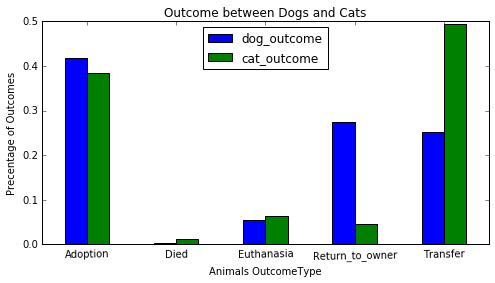

In [18]:
plt.figure()
dogandcat_outcome.plot(kind='bar',figsize = (8,4),rot=1.0)
plt.ylabel('Precentage of Outcomes')
plt.xlabel('Animals OutcomeType')
plt.title('Outcome between Dogs and Cats')
plt.show()

Next, let's explore the animals sex a little bit

In [19]:
train['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [20]:
groupbysex = train.groupby(['SexuponOutcome', 'OutcomeType'])['OutcomeType'].count()
groupbysex.unstack().head()

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
SexuponOutcome,,,,,
Intact Female,203.0,56.0,401.0,301.0,2550.0
Intact Male,158.0,79.0,477.0,477.0,2334.0
Neutered Male,5222.0,19.0,344.0,2247.0,1947.0
Spayed Female,5186.0,18.0,232.0,1748.0,1636.0
Unknown,NaN,25.0,101.0,12.0,955.0


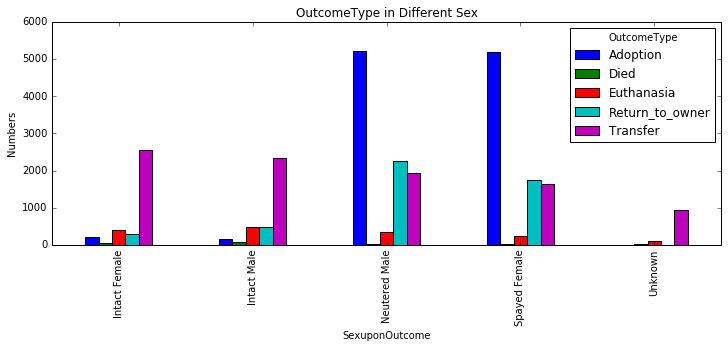

In [21]:
groupbysex_plot = groupbysex.unstack().plot(kind = 'bar', figsize = (12, 4))
groupbysex_plot.set_title('OutcomeType in Different Sex')
groupbysex_plot.set_ylabel('Numbers')

Neutered Male and Spayed Female have better chance to be adopted, which other sexes have much higher chance to be transfered.

Let's explore more on Age

In [22]:
train['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

Age ranges from 1 day to 20 years. It should be a good idea to transfer all of them into days

In [25]:
def age_to_day(age):
    if type(age) is str:
        if 'day' in age:
            age_to_day = int(age.split(' ')[0])
        elif 'week' in age:
            age_to_day = int(age.split(' ')[0])*7
        elif 'month' in age:
            age_to_day = int(age.split(' ')[0])*30
        elif 'year' in age:
            age_to_day = int(age.split(' ')[0])*365
    else:
        age_to_day = 0
    return age_to_day
        

In [26]:
train['Ageindays'] = train['AgeuponOutcome'].apply(age_to_day)

In [30]:
train['Ageindays'].describe()

count    26729.000000
mean       793.595982
std       1082.661580
min          0.000000
25%         60.000000
50%        365.000000
75%       1095.000000
max       7300.000000
Name: Ageindays, dtype: float64

Now let's plot the corrlation between age and outcome

In [33]:
groupbyage = train.groupby(['Ageindays', 'OutcomeType'])['OutcomeType'].count()
groupbyage.unstack().head()

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Ageindays,,,,,
0,NaN,1.0,4.0,NaN,35.0
1,NaN,2.0,NaN,6.0,58.0
2,NaN,5.0,4.0,NaN,90.0
3,NaN,3.0,3.0,NaN,103.0
4,NaN,2.0,NaN,NaN,48.0


(0, 5000)

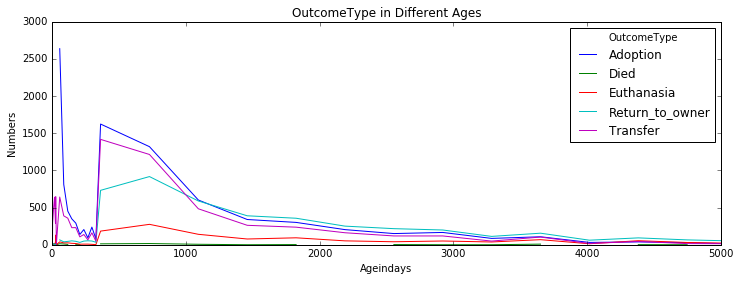

In [37]:
groupbyage_plot = groupbyage.unstack().plot(kind = 'line', figsize = (12, 4))
groupbyage_plot.set_title('OutcomeType in Different Ages')
groupbyage_plot.set_ylabel('Numbers')
groupbyage_plot.set_xlim([0, 5000])

There is a big peak in young animals for adoption. Let's find out that age

In [39]:
groupbyage.unstack().sort(['Adoption'], ascending = False)

C:\Users\jing\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Ageindays,,,,,
60,2636.0,14.0,39.0,66.0,642.0
365,1623.0,13.0,184.0,732.0,1417.0
730,1319.0,17.0,275.0,917.0,1214.0
90,811.0,11.0,26.0,40.0,389.0
1095,602.0,7.0,141.0,589.0,484.0
120,453.0,5.0,26.0,46.0,358.0
30,444.0,48.0,131.0,11.0,647.0
150,349.0,NaN,20.0,53.0,230.0
1460,340.0,1.0,78.0,390.0,262.0


animals aging at 60 days (or two months) have a better chance to be adopted

Next, let's look at breed and color

In [40]:
train['Breed'].describe()

count                      26729
unique                      1380
top       Domestic Shorthair Mix
freq                        8810
Name: Breed, dtype: object

In [41]:
train['Color'].describe()

count           26729
unique            366
top       Black/White
freq             2824
Name: Color, dtype: object

In [45]:
groupbybreed = train.groupby(['Breed', 'OutcomeType'])['OutcomeType'].count()
groupbybreed.unstack().sort('Adoption',ascending = False).head()

C:\Users\jing\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Breed,,,,,
Domestic Shorthair Mix,3273.0,112.0,535.0,352.0,4538.0
Chihuahua Shorthair Mix,767.0,13.0,78.0,407.0,501.0
Labrador Retriever Mix,590.0,4.0,57.0,369.0,343.0
Pit Bull Mix,568.0,5.0,257.0,598.0,478.0
Domestic Medium Hair Mix,357.0,11.0,62.0,26.0,383.0


In [47]:
train['Color'].value_counts().head(20)

Black/White            2824
Black                  2292
Brown Tabby            1635
Brown Tabby/White       940
White                   931
Brown/White             884
Orange Tabby            841
Tan/White               773
Tricolor                752
Blue/White              702
Black/Tan               672
White/Black             643
Brown                   639
Tan                     628
White/Brown             569
Tortie                  530
Calico                  517
Orange Tabby/White      455
Brown Brindle/White     450
Blue                    450
Name: Color, dtype: int64